In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#Creating a dataframe containing the data used in the paper (limit to independent variables only).
complete_df = pd.read_csv('prices.csv')
df = complete_df[['Date','Close','Volume','Ticker','Country']]
df = df.sort_values(by=['Ticker','Date'])
df['Return']=df.groupby('Ticker')['Close'].transform(lambda x: np.log(x.shift(-1)/x))

In [11]:
df

,Date,Close,Volume,Ticker,Country,Return
310097,2000-01-03 00:00:00-05:00,0.848323,535796800.0,AAPL,usa,-0.088077
310056,2000-01-04 00:00:00-05:00,0.776801,512377600.0,AAPL,usa,0.014527
310022,2000-01-05 00:00:00-05:00,0.788168,778321600.0,AAPL,usa,-0.090514
309992,2000-01-06 00:00:00-05:00,0.719961,767972800.0,AAPL,usa,0.046281
309979,2000-01-07 00:00:00-05:00,0.754065,460734400.0,AAPL,usa,-0.017744
...,...,...,...,...,...,...
231,2025-06-30 00:00:00-04:00,77.980003,3626300.0,ZM,usa,-0.005272
206,2025-07-01 00:00:00-04:00,77.570000,3051600.0,ZM,usa,0.000258
116,2025-07-02 00:00:00-04:00,77.589996,2597000.0,ZM,usa,0.012679
9,2025-07-03 00:00:00-04:00,78.580002,2882442.0,ZM,usa,0.000000


In [12]:
#Limiting the country to usa and the timeframe from 2000 to 2005.
final_df = df.loc[(df.Country == 'usa') & (df.Date >= '2000-01-01 00:00:00-05:00') & (df.Date <= '2006-01-01 00:00:00-05:00') ]

In [13]:
final_df

,Date,Close,Volume,Ticker,Country,Return
310097,2000-01-03 00:00:00-05:00,0.848323,535796800.0,AAPL,usa,-0.088077
310056,2000-01-04 00:00:00-05:00,0.776801,512377600.0,AAPL,usa,0.014527
310022,2000-01-05 00:00:00-05:00,0.788168,778321600.0,AAPL,usa,-0.090514
309992,2000-01-06 00:00:00-05:00,0.719961,767972800.0,AAPL,usa,0.046281
309979,2000-01-07 00:00:00-05:00,0.754065,460734400.0,AAPL,usa,-0.017744
...,...,...,...,...,...,...
257377,2005-12-23 00:00:00-05:00,37.008316,2830900.0,TGT,usa,0.001260
257342,2005-12-27 00:00:00-05:00,37.054981,3994600.0,TGT,usa,-0.000540
257306,2005-12-28 00:00:00-05:00,37.034977,2841400.0,TGT,usa,-0.005596
257256,2005-12-29 00:00:00-05:00,36.828308,2224000.0,TGT,usa,-0.004900


In [14]:
#Choose one ticker (NVDA) and plot each of the features across time
NVDA = final_df[['Date','Return','Volume']].loc[df.Ticker == 'NVDA']
NVDA['Date']=pd.to_datetime(NVDA['Date'])
NVDA = NVDA.set_index('Date', inplace=False)

NVDA['ChangeVol'] = NVDA.Volume.pct_change()
NVDA['LagVol']=NVDA.Volume.shift(1)
NVDA['ChangeLagVol']=NVDA.LagVol.pct_change()


C:\Users\Jojie\AppData\Local\Temp\ipykernel_33320\509142579.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  NVDA['Date']=pd.to_datetime(NVDA['Date'])


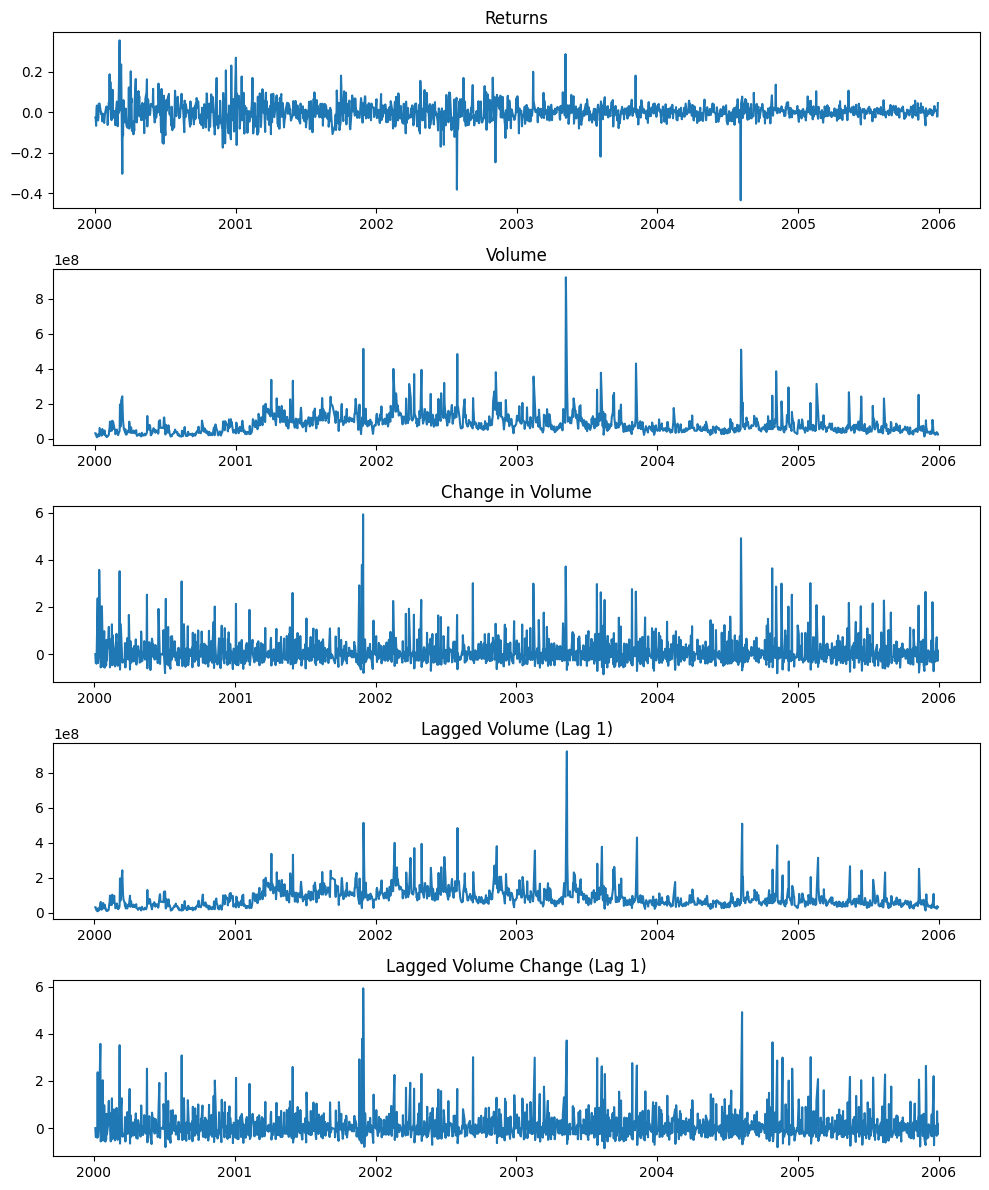

In [15]:
fig, axs = plt.subplots(5, 1, figsize=(10,12))

axs[0].plot(NVDA['Return'])
axs[0].set_title("Returns")

axs[1].plot(NVDA['Volume'])
axs[1].set_title("Volume")

axs[2].plot(NVDA['ChangeVol'])
axs[2].set_title("Change in Volume")

axs[3].plot(NVDA['LagVol'])
axs[3].set_title("Lagged Volume (Lag 1)")

axs[4].plot(NVDA['ChangeLagVol'])
axs[4].set_title("Lagged Volume Change (Lag 1)")


plt.tight_layout()
plt.show()


In [16]:
NVDA

,Return,Volume,ChangeVol,LagVol,ChangeLagVol
Date,,,,,
2000-01-03 00:00:00-05:00,-0.027065,30091200.0,NaN,NaN,NaN
2000-01-04 00:00:00-05:00,-0.033476,30048000.0,-0.001436,30091200.0,NaN
2000-01-05 00:00:00-05:00,-0.067475,18835200.0,-0.373163,30048000.0,-0.001436
2000-01-06 00:00:00-05:00,0.016554,12048000.0,-0.360347,18835200.0,-0.373163
2000-01-07 00:00:00-05:00,0.032308,7118400.0,-0.409163,12048000.0,-0.360347
...,...,...,...,...,...
2005-12-23 00:00:00-05:00,0.006108,21453600.0,-0.326071,31833600.0,0.100062
2005-12-27 00:00:00-05:00,0.009224,36796800.0,0.715181,21453600.0,-0.326071
2005-12-28 00:00:00-05:00,-0.022550,26442000.0,-0.281405,36796800.0,0.715181
